In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
le = LabelEncoder()
df["State"] = le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
X = df.drop(columns=['Profit'])
y = df['Profit']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [11]:
model = LinearRegression()
kfold = KFold(n_splits=4)
score = cross_val_score(model, X,y,cv =kfold, scoring='neg_root_mean_squared_error' )
print(score)

[ -9418.18983049  -9806.72408463  -6551.24951944 -14632.38196009]


In [12]:
model.fit(X_train,y_train)
model.coef_

array([ 8.10800557e-01, -4.47899103e-02,  2.68062532e-02, -1.51843070e+02])

In [13]:
model.intercept_

52022.778179674366

In [15]:
y_pred = model.predict(X_test)

r2_score(y_test,y_pred)

0.9794557471168575

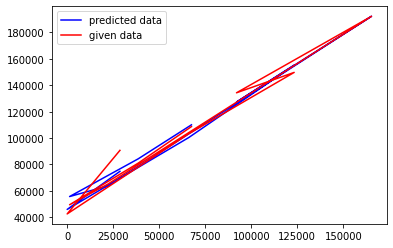

In [16]:
plt.plot(X_test['R&D Spend'],y_pred, 'b', label='predicted data')
plt.plot(X_test['R&D Spend'],y_test, 'r', label='given data')
plt.legend()
plt.show()